# YouTube trending videos

In [176]:
import os
from typing import List

import numpy as np
from numpy import nan

# import sys
# sys.path.append('..')
nan
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

from helpers.files import load_csv, load_csv_file, save_csv
from helpers.json_helper import load_tokenized_text
from ped6.tfidf import add_tfidf_args

numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day", "publish_time", "movie_domains_count"
]

bool_attrs = [
    "comments_disabled", "ratings_disabled", "video_error_or_removed"
]

selected_attrs = []

forbidden_attrs = [ "views", "likes", "dislikes", "comment_count"]


## Etap 5 - Powtórzone po przefiltrowaniu danych - Zbieranie danych nie-trending

### Wczytanie danych trending

In [177]:
gb_videos, us_videos = load_csv("ped5_t_filtered")
trending_videos = pd.concat([gb_videos, us_videos], ignore_index=True)

### Wczytanie danych nie trending

In [178]:
gb_non_videos, us_non_videos = load_csv("ped5_nt_filtered")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos], ignore_index=True)
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

### Atrybuty liczbowe

**Funkcja do rysowania wykresów**

In [179]:
def plot_numeric_attr(attr_name: str, trending: pd.DataFrame, non_trending: pd.DataFrame) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
    axes[0, 0].hist(trending[attr_name])
    axes[0, 0].title.set_text(f"Trending: {attr_name}")
    axes[0, 1].hist(non_trending[attr_name])
    axes[0, 1].title.set_text(f"Non Trending: {attr_name}")
    axes[1, 0].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"]
    )
    axes[1, 1].boxplot(
        [trending[trending[attr_name].notna()][attr_name], non_trending[attr_name]],
        labels=["Trending", "Non Trending"],
        showfliers=False
    )

**Views**

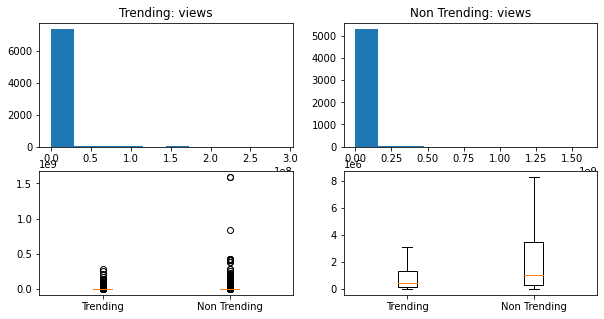

In [180]:
plot_numeric_attr("views", trending_videos, non_trending_videos)

**Likes**

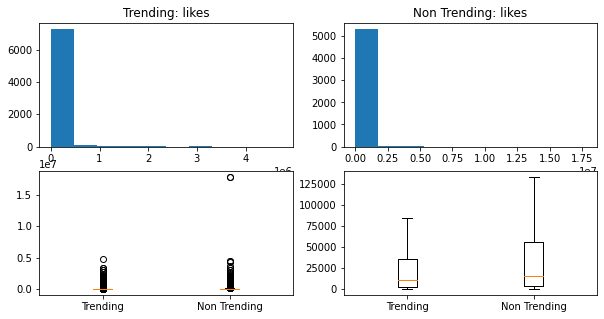

In [181]:
plot_numeric_attr("likes", trending_videos, non_trending_videos)

**Dislikes**

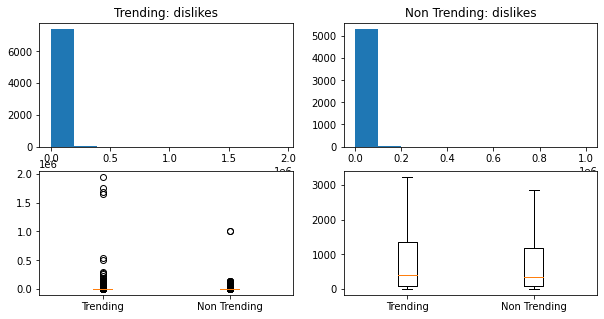

In [182]:
plot_numeric_attr("dislikes", trending_videos, non_trending_videos)

**Comment Count**

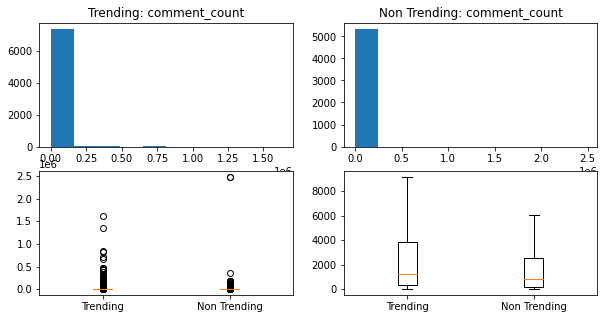

In [183]:
plot_numeric_attr("comment_count", trending_videos, non_trending_videos)

**Description length**

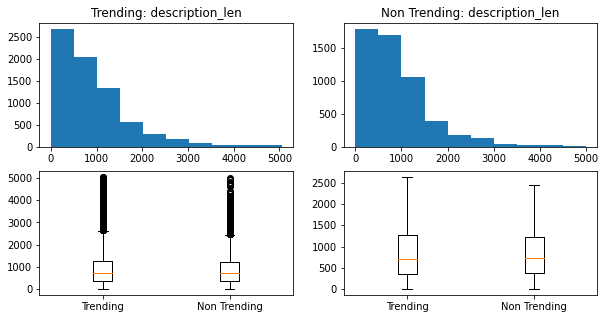

In [184]:
plot_numeric_attr("description_len", trending_videos, non_trending_videos)

**Title length**

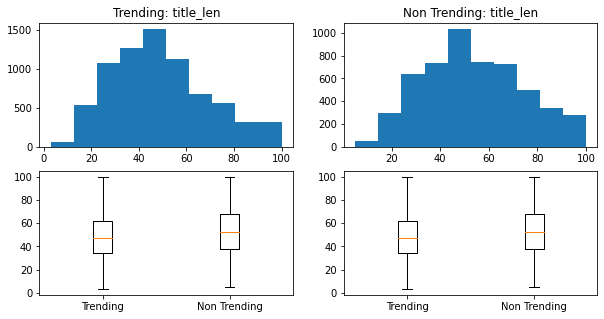

In [185]:
plot_numeric_attr("title_len", trending_videos, non_trending_videos)

**Channel title length**

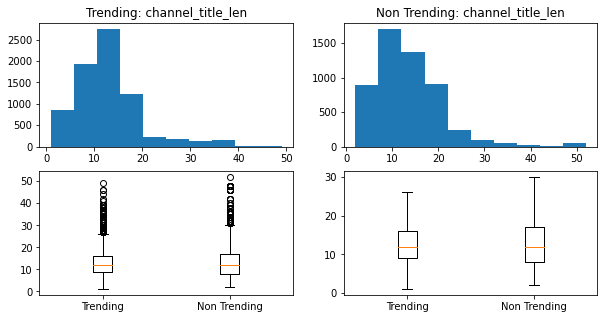

In [186]:
plot_numeric_attr("channel_title_len", trending_videos, non_trending_videos)

**Liczba linków**

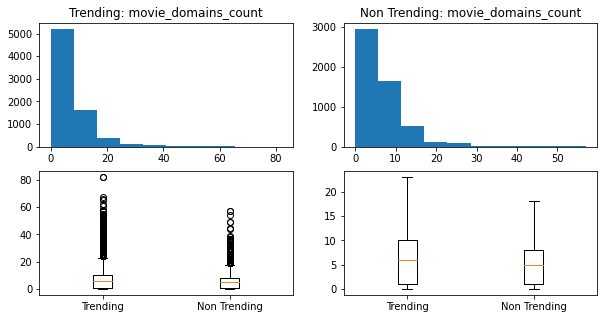

In [187]:
plot_numeric_attr("movie_domains_count", trending_videos, non_trending_videos)

### Atrybuty czasowe

**Dzień opublikowania filmu**

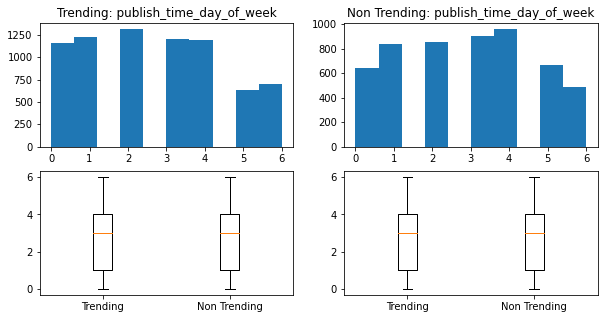

In [188]:
plot_numeric_attr("publish_time_day_of_week", trending_videos, non_trending_videos, )

**Godzina opublikowania filmu**

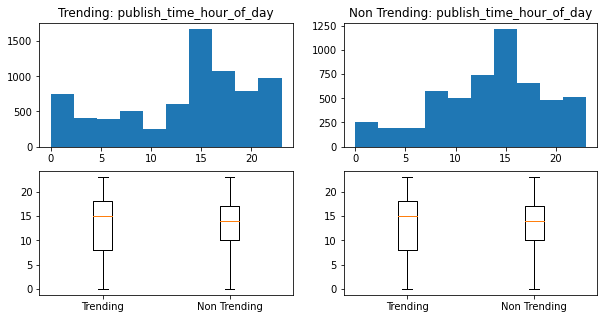

In [189]:
plot_numeric_attr("publish_time_hour_of_day", trending_videos, non_trending_videos)

**Data publikacji**

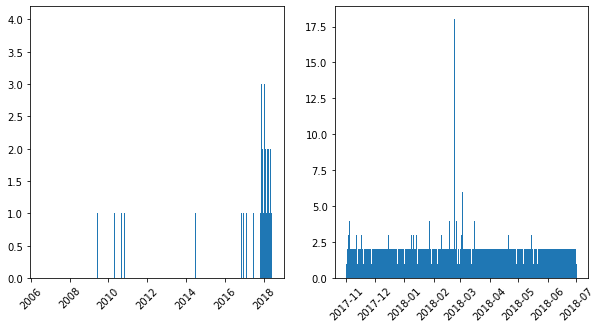

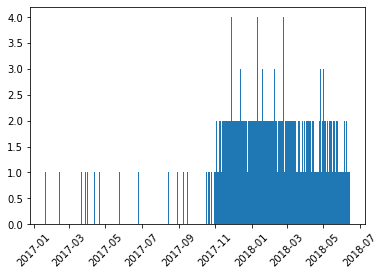

In [190]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

trending_publish_time_counts = pd.to_datetime(trending_videos["publish_time"],
                                              format="%Y-%m-%dT%H:%M:%S.%fZ").value_counts()
trending_publish_time_counts = trending_publish_time_counts.rename_axis("publish_time").reset_index(name="count")

publish_times = pd.to_datetime(trending_videos["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ")
filtered = publish_times[publish_times >= "2017-01-01"]
filtered_counts = filtered.value_counts().rename_axis("publish_time").reset_index(name="count")

non_trending_publish_time_counts = pd.to_datetime(non_trending_videos["publish_time"],
                                                  format="%Y-%m-%dT%H:%M:%SZ").value_counts()
non_trending_publish_time_counts = non_trending_publish_time_counts.rename_axis("publish_time").reset_index(
    name="count")

axes[0].bar(pd.to_datetime(trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"),
            trending_publish_time_counts["count"])
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

axes[1].bar(pd.to_datetime(non_trending_publish_time_counts["publish_time"], format="%Y-%m-%dT%H:%M:%SZ"),
            non_trending_publish_time_counts["count"])
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)
plt.show()

plt.bar(pd.to_datetime(filtered_counts["publish_time"], format="%Y-%m-%dT%H:%M:%S.%fZ"), filtered_counts["count"])
plt.xticks(rotation=45)
plt.show()

### Atrybuty logiczne

**Funkcja do rysowania wykresów**

In [191]:
def plot_bool_attr(attr_name: str) -> None:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    trending_values_counts = trending_videos[attr_name].value_counts().rename_axis("value").reset_index(name="count")
    axes[0].bar(np.arange(len(trending_values_counts)), trending_values_counts["count"])
    axes[0].set_xticks(np.arange(len(trending_values_counts)))
    axes[0].set_xticklabels(["False", "True"][:len(trending_values_counts)])
    axes[0].title.set_text(f"Trending: {attr_name}")
    non_trending_values_counts = non_trending_videos[attr_name].value_counts().rename_axis("value").reset_index(
        name="count")
    axes[1].bar(np.arange(len(non_trending_values_counts)), non_trending_values_counts["count"])
    axes[1].set_xticks(np.arange(len(non_trending_values_counts)))
    axes[1].set_xticklabels(["False", "True"][:len(non_trending_values_counts)])
    axes[1].title.set_text(f"Non Trending: {attr_name}")

**Zablokowanie komentowania - comments disabled**

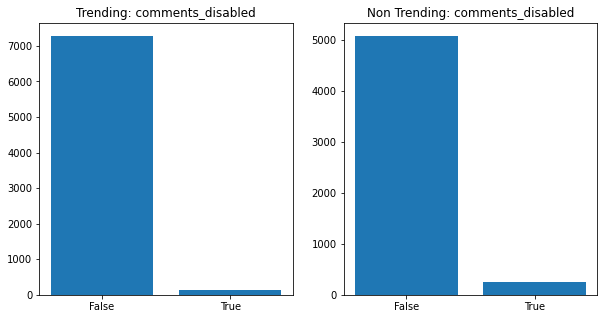

In [192]:
plot_bool_attr("comments_disabled")

**Zablokowanie oceny - ratings disabled**

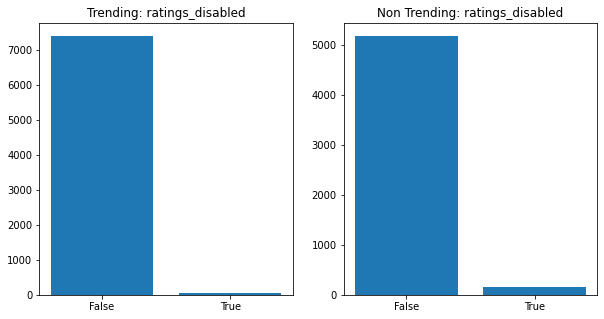

In [193]:
plot_bool_attr("ratings_disabled")

**Błąd filmu lub usunięty - video error or removed**

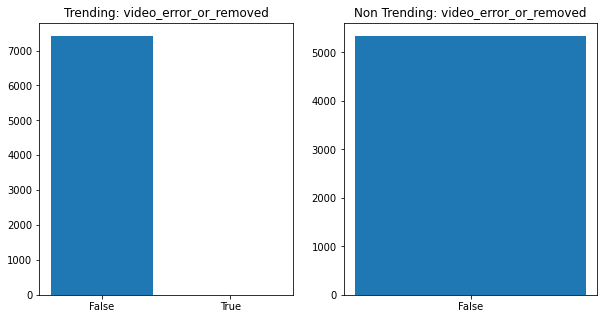

In [194]:
plot_bool_attr("video_error_or_removed")

### Atrybuty tekstowe

**Metoda do wyświetlania wykresów**

In [195]:
def plot_tokenized_stats(attr_name):
    trending_path = os.path.join("ped5_t_filtered", "words")

    gb_words = load_csv_file(os.path.join(trending_path, f"GB_{attr_name}.csv"))
    us_words = load_csv_file(os.path.join(trending_path, f"US_{attr_name}.csv"))
    trending_words = pd.concat([gb_words, us_words])
    trending_values_counts = trending_words.value_counts().rename_axis("words").reset_index(name="count")
    tr_head = trending_values_counts.head(50)

    non_trending_path = os.path.join("ped5_nt_filtered", "words")

    gb_non_words = load_csv_file(os.path.join(non_trending_path, f"GB_{attr_name}.csv"))
    us_non_words = load_csv_file(os.path.join(non_trending_path, f"US_{attr_name}.csv"))
    non_trending_words = pd.concat([gb_non_words, us_non_words])
    non_trending_values_counts = non_trending_words.value_counts().rename_axis("words").reset_index(name="count")
    non_tr_head = non_trending_values_counts.head(50)

    plt.subplots(figsize=(18, 5))
    plt.bar(tr_head["words"], tr_head["count"])
    plt.title("Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    plt.subplots(figsize=(18, 5))
    plt.bar(non_tr_head["words"], non_tr_head["count"])
    plt.title("Non Trending")
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

**Tytuły kanałów - channel_title**

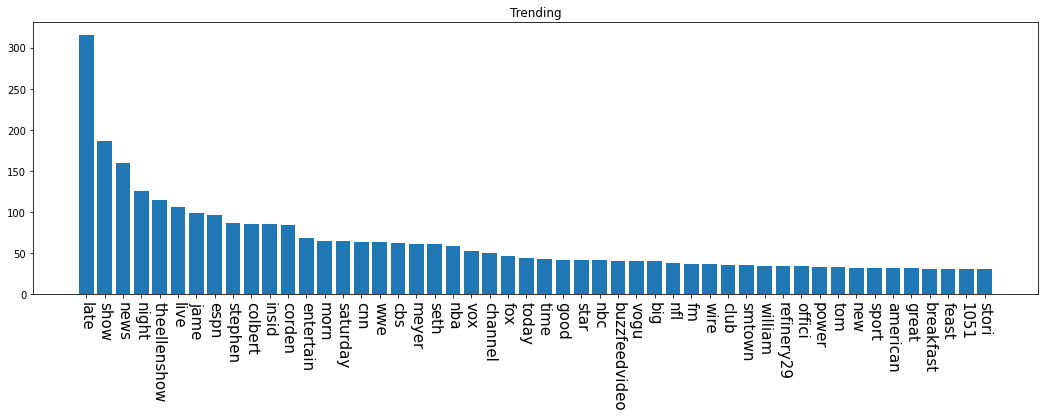

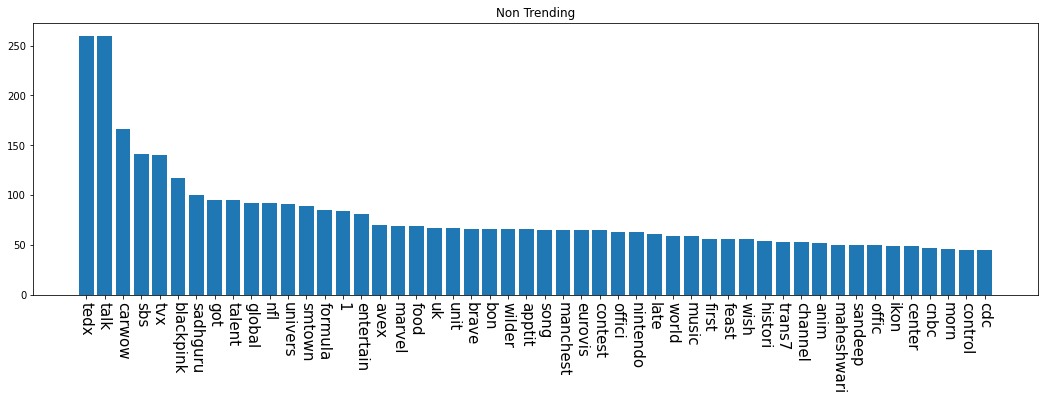

In [196]:
plot_tokenized_stats("channel_title")

**Tytuły filmów - title**

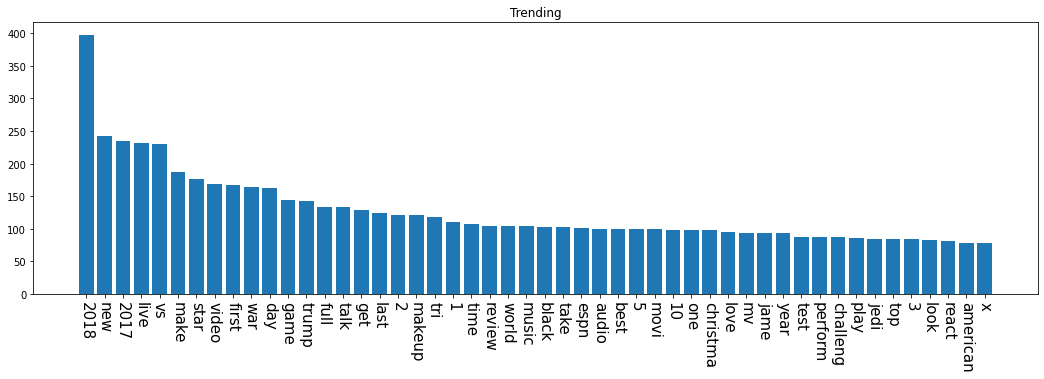

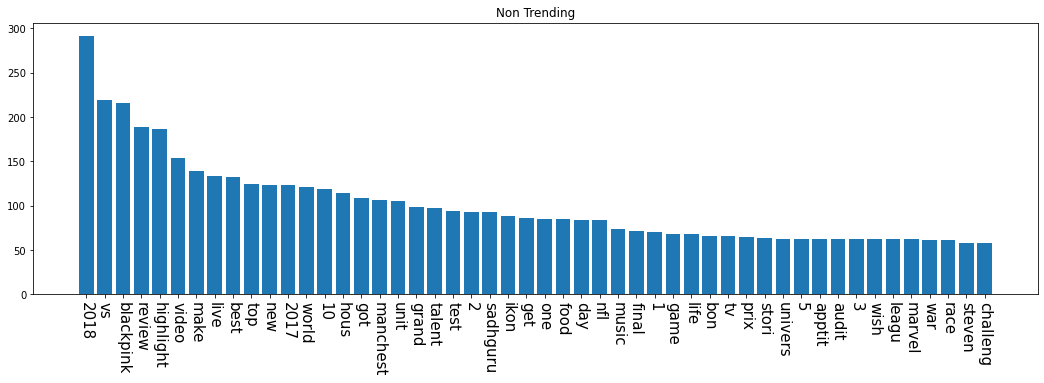

In [197]:
plot_tokenized_stats("title")

**Opisy filmów - description**

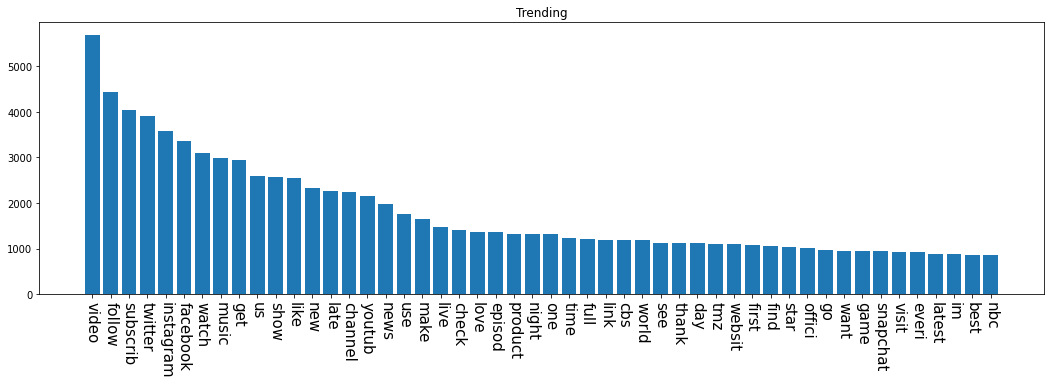

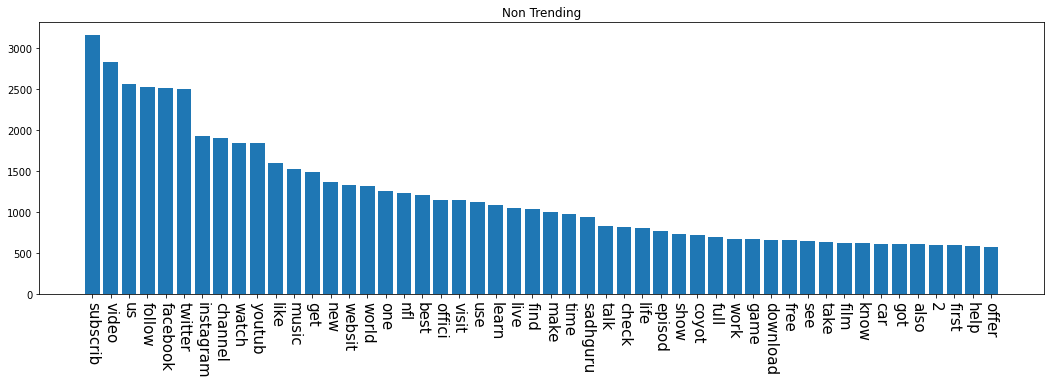

In [198]:
plot_tokenized_stats("description")

**Domeny**

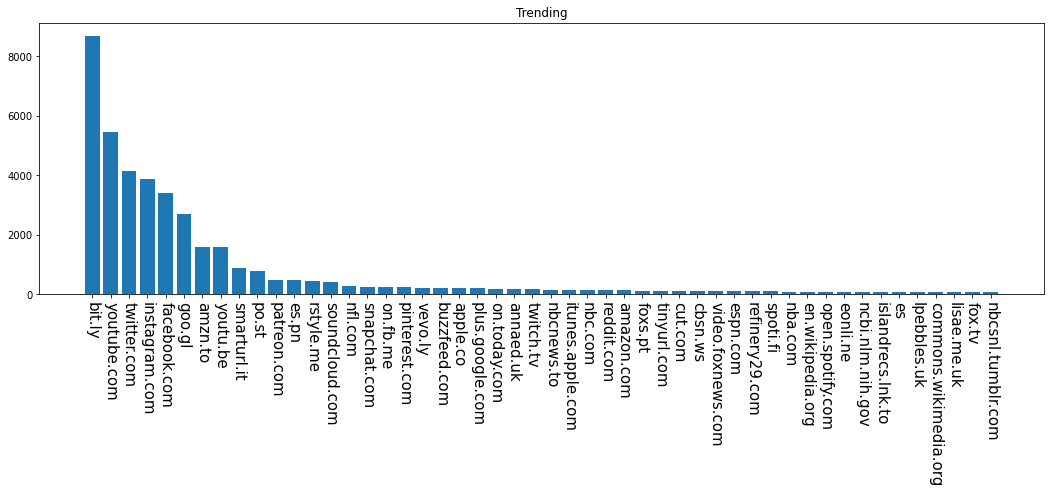

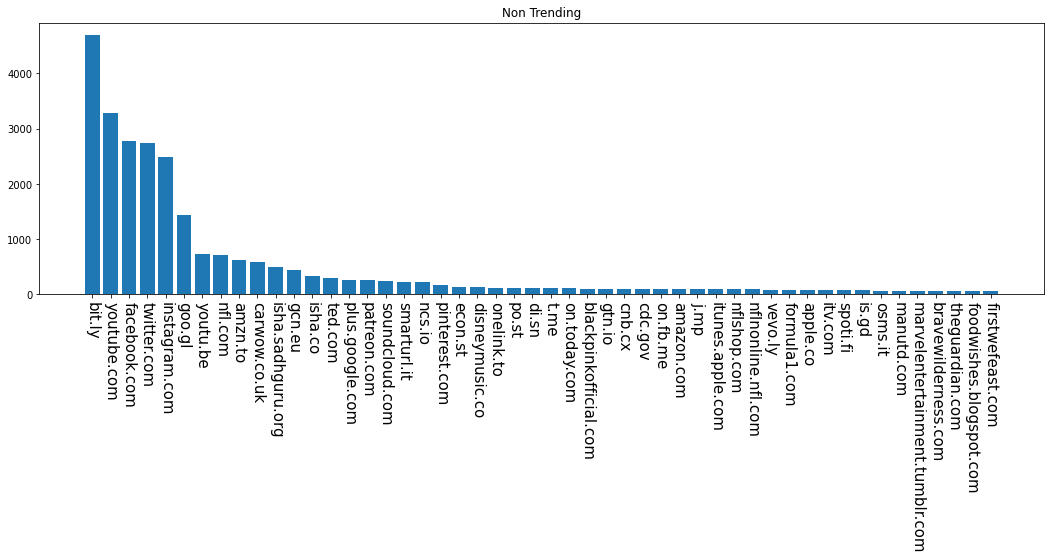

In [199]:
plot_tokenized_stats("domain")

**Tagi**

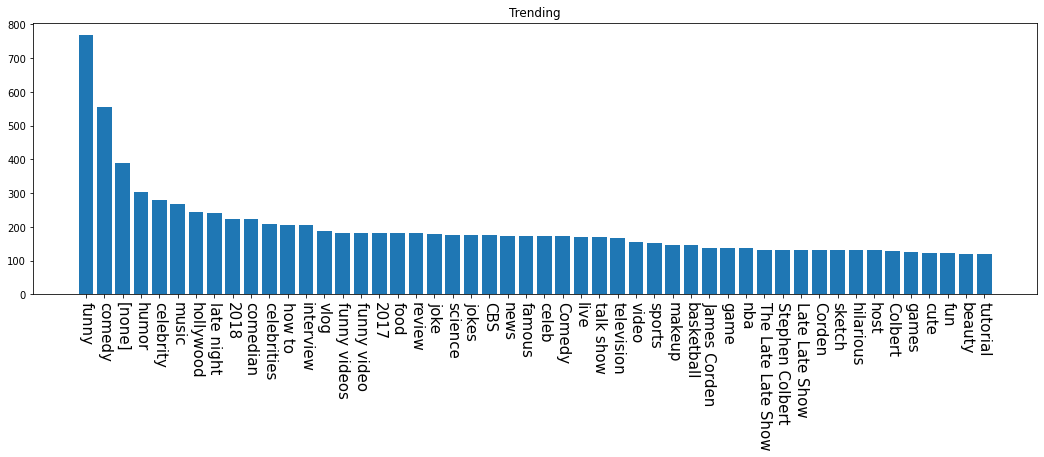

c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47932 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50528 missing from current font.
  font.

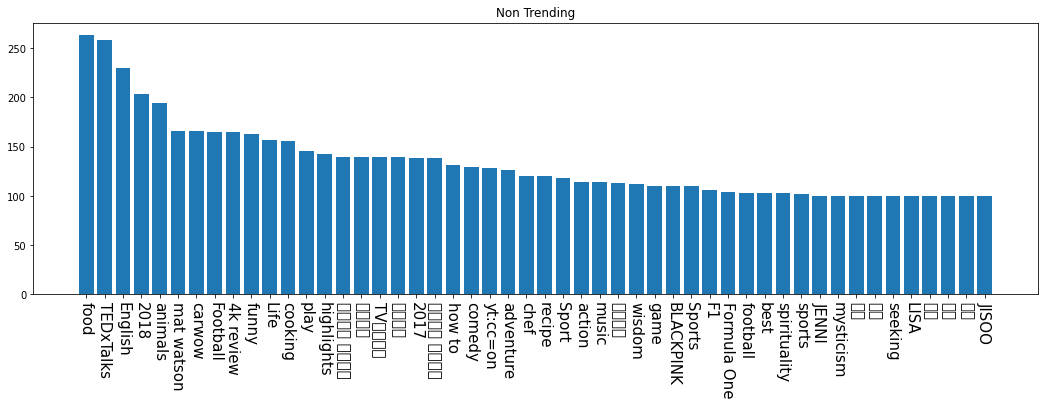

In [200]:
def prepare_tags(tags):
    tags.index = tags.index.droplevel(-1)
    tags.name = "tags"
    tags = tags.to_frame()
    tags_counts = tags.value_counts()
    tags_counts = tags_counts.rename_axis("tag").reset_index(name="count")
    return tags_counts


non_trending_tags = non_trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()
trending_tags = trending_videos["tags"].str.split("|").apply(pd.Series, 1).stack()

non_trending_tags = prepare_tags(non_trending_tags)
trending_tags = prepare_tags(trending_tags)

plt.subplots(figsize=(18, 5))
plt.bar(trending_tags["tag"].head(50), trending_tags["count"].head(50))
plt.title("Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

plt.subplots(figsize=(18, 5))
plt.bar(non_trending_tags["tag"].head(50), non_trending_tags["count"].head(50))
plt.title("Non Trending")
plt.xticks(rotation=270, fontsize=15)
plt.show()

## Ocena atrybutów


### Atrybuty numeryczne

Korelacja atrybutów liczbowych z klasą decyzyjną trending czy nietrending

Atrybuty numeryczne zostały ocenione za pomocą analizy wariancji (ANOVA Analysis of Variance).
Zastosowana metoda wynika z tego, że mamy jednym z atrybutów jest atrybut
nominalny - klasę decyzyjną trending vs non trending.

Przyjęte hipotezy:

$$ H_0 $$: Średnie w poszczególnych grupach są takie same.

$$ H_1 $$: Średnie w poszczególnych grupach są różne.


Przyjęty poziom istotności: $$ \alpha = 0.05 $$

In [201]:
gb_videos, us_videos = load_csv("ped5_t_filtered")
trending_videos = pd.concat([gb_videos, us_videos], ignore_index=True)

gb_non_videos, us_non_videos = load_csv("ped5_nt_filtered")
non_trending_videos = pd.concat([gb_non_videos, us_non_videos], ignore_index=True)
non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)
print(len(gb_non_videos))


numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]


def anova(data: List[pd.DataFrame], attr: str, show_plots: bool = True):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    if show_plots:
        plt.title(attr)
        plt.boxplot(data_set, showfliers=False)
        labels = ["Trending", "Non Trending"]
        plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
        plt.show()
    return f_score, p_value



3097


views: f_score = 67.32581532705106 p_value = 2.5208931081761888e-16


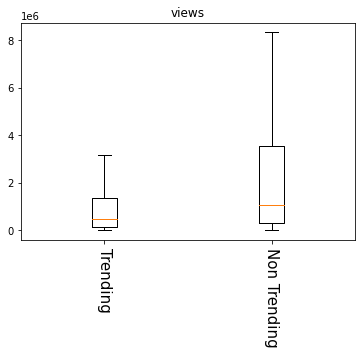

likes: f_score = 21.51881061035196 p_value = 3.538555935662249e-06


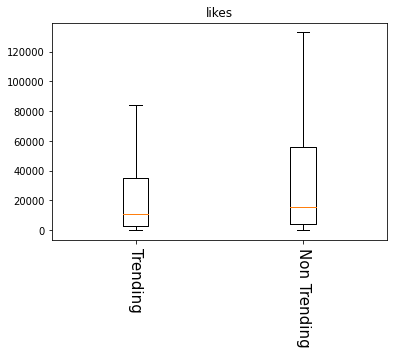

dislikes: f_score = 3.471305594226898 p_value = 0.06246495337899544


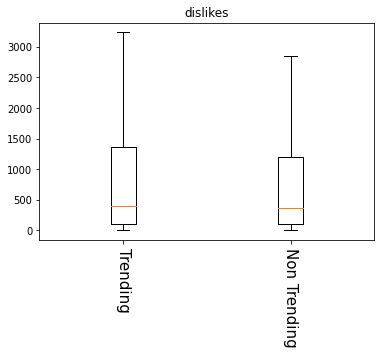

comment_count: f_score = 6.291832408306202 p_value = 0.012141857068117523


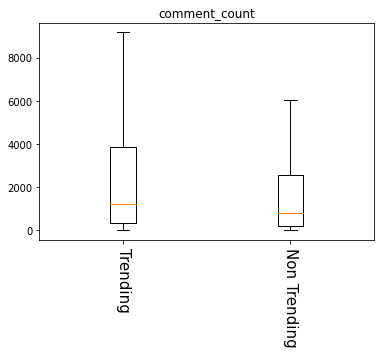

description_len: f_score = 1.7720576863763269 p_value = 0.18315167764485182


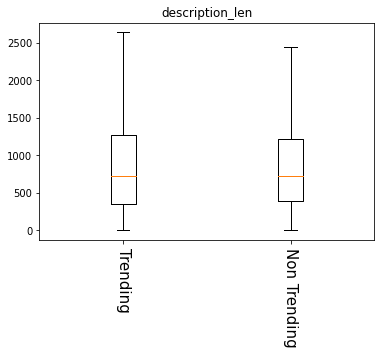

title_len: f_score = 149.47003600883633 p_value = 3.514339038305606e-34


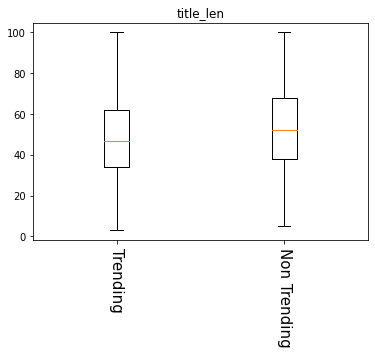

channel_title_len: f_score = 3.64478495585723 p_value = 0.05626746169647248


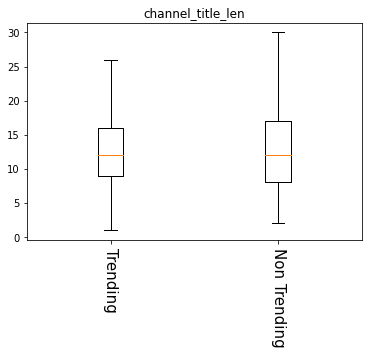

publish_time_day_of_week: f_score = 49.01588002549828 p_value = 2.666028947711909e-12


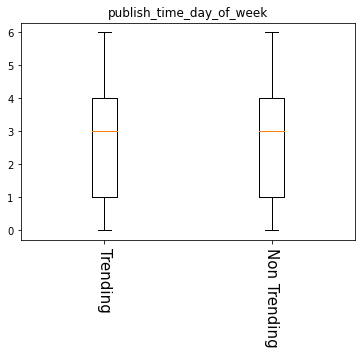

publish_time_hour_of_day: f_score = 0.34903659611344057 p_value = 0.5546694549784806


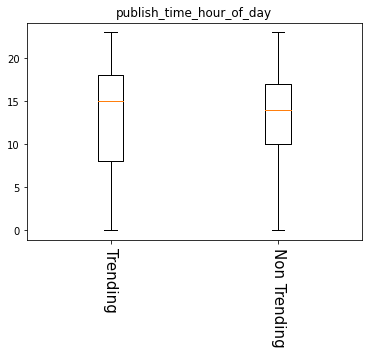

,attr,f score,p value,leq alpha
0,views,67.325815,2.520893e-16,True
1,likes,21.518811,3.538556e-06,True
2,dislikes,3.471306,6.246495e-02,False
3,comment_count,6.291832,1.214186e-02,True
4,description_len,1.772058,1.831517e-01,False
5,title_len,149.470036,3.514339e-34,True
6,channel_title_len,3.644785,5.626746e-02,False
7,publish_time_day_of_week,49.015880,2.666029e-12,True
8,publish_time_hour_of_day,0.349037,5.546695e-01,False


In [202]:
data_set = [trending_videos, non_trending_videos]

f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(data_set, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
    if p <= alpha and i not in forbidden_attrs:
        selected_attrs.append(i)
f_scores

### Atrybuty liczbowe wyekstrahowane z cech obrazków

Liczone są analogicznie jak poprzednich etapach. Najpierw wczytywane są już przeliczone dane, a następnie za pomocą anovy liczona jest istotność statystyczna.

In [203]:
images_data_cols = ["gray_mean_score", "color_mean_score", "gray_hist_score", "red_hist_score", "green_hist_score",
                    "blue_hist_score",
                    "edges_score", "entropy_score"]

non_trending_videos_img = load_csv("images_data_non_trending")[0]

for col in images_data_cols:
    non_trending_videos[col] = non_trending_videos_img[col].reset_index(drop=True)
list(non_trending_videos.columns)
list(trending_videos.columns)

['new_video_id',
 'video_id',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'description_len',
 'title_len',
 'channel_title_len',
 'publish_time_day_of_week',
 'publish_time_hour_of_day',
 'movie_domains_count',
 'gray_mean_score',
 'color_mean_score',
 'gray_hist_score',
 'red_hist_score',
 'green_hist_score',
 'blue_hist_score',
 'edges_score',
 'entropy_score']

gray_mean_score: f_score = 22.691334804791552 p_value = 1.9199324741777514e-06


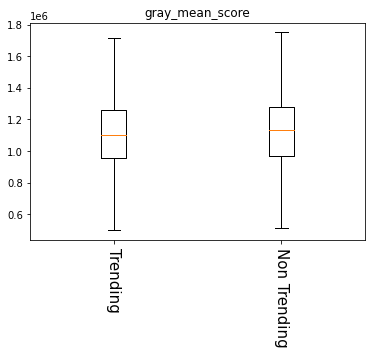

color_mean_score: f_score = 21.961888425592882 p_value = 2.8054791512554367e-06


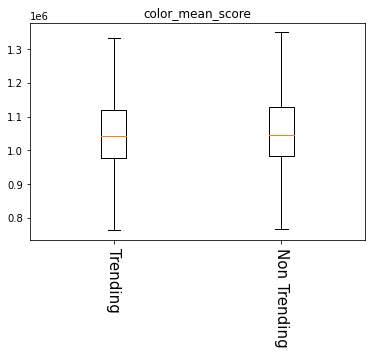

gray_hist_score: f_score = 0.42955930717423374 p_value = 0.512215258053786


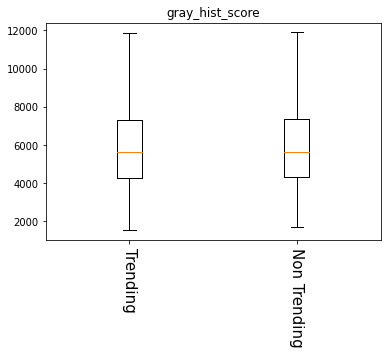

red_hist_score: f_score = 2.9974434260258978 p_value = 0.08341645489518011


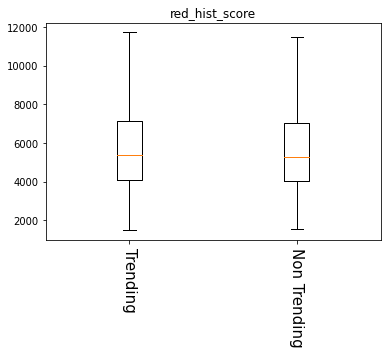

green_hist_score: f_score = 0.5464461119087296 p_value = 0.4597849538452098


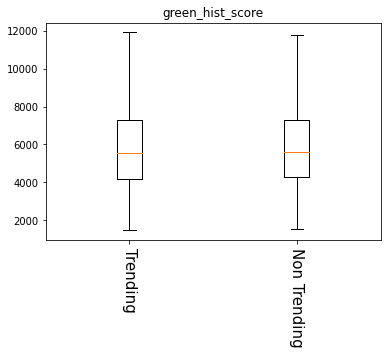

blue_hist_score: f_score = 0.06389532085493306 p_value = 0.8004453461645417


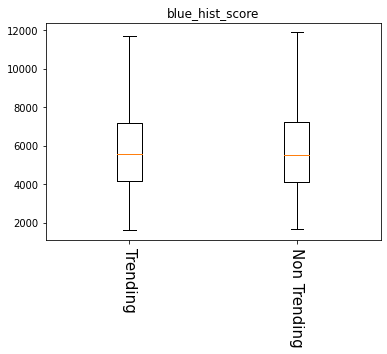

edges_score: f_score = 30.56221959831848 p_value = 3.286914252408378e-08


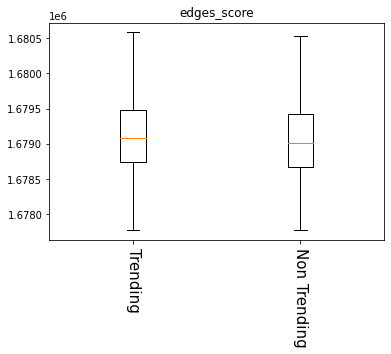

entropy_score: f_score = 4.622197293316586 p_value = 0.03157662398576343


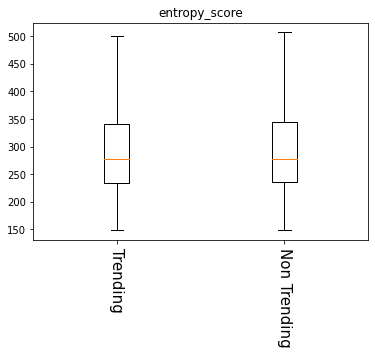

,attr,f score,p value,leq alpha
0,gray_mean_score,22.691335,1.919932e-06,True
1,color_mean_score,21.961888,2.805479e-06,True
2,gray_hist_score,0.429559,5.122153e-01,False
3,red_hist_score,2.997443,8.341645e-02,False
4,green_hist_score,0.546446,4.597850e-01,False
5,blue_hist_score,0.063895,8.004453e-01,False
6,edges_score,30.562220,3.286914e-08,True
7,entropy_score,4.622197,3.157662e-02,True


In [204]:
data_set = [trending_videos, non_trending_videos_img]

f_scores_img = pd.DataFrame()
alpha = 0.05
for i in images_data_cols:
    f, p = anova(data_set, i)
    f_scores_img = f_scores_img.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
    if p <= alpha and i not in forbidden_attrs:
        selected_attrs.append(i)
f_scores_img

Spośród atrybutów z obrazków, można zauważyć, że okoła połowa z nich może okazać się pomocna w klasyfkacji do podziału trending/non_trending, gdzie najbardziej istotny zdaje się być informacja o krawędziach, co można częściowo interpretować jako liczbę różnych obiektów na obrazku

### Ocena atrybutów tekstowych

W przypadku atrybutów tekstowych zdecydowaliśmy się użyć reprezentacji TF-IDF

In [205]:
n_features = 20

**Tytuły - title**

In [206]:
title_tfidf, f_names = add_tfidf_args("title", n_features)
trending_tfidf = title_tfidf[:len(trending_videos)]
non_trending_tfidf = title_tfidf[len(trending_videos):].reset_index(drop=True)
for i, name in enumerate(f_names):
    trending_videos[f"title_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"title_tfidf_{name}"] = non_trending_tfidf[i]

f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"title_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,10,15.583166,7.937780e-05,True
1,2017,8.831938,2.965557e-03,True
2,2018,1.447775,2.289076e-01,False
3,best,18.709719,1.533607e-05,True
4,blackpink,160.181740,1.710154e-36,True
5,day,5.705691,1.692443e-02,True
6,first,45.356890,1.712437e-11,True
7,game,11.566655,6.735085e-04,True
8,get,0.556806,4.555636e-01,False
9,highlight,92.225080,9.163202e-22,True


**Tytuły kanałów - channel_title**

In [207]:
channel_title_tfidf, f_names = add_tfidf_args("channel_title", n_features)
trending_tfidf = channel_title_tfidf[:len(trending_videos)]
non_trending_tfidf = channel_title_tfidf[len(trending_videos):].reset_index(drop=True)

for i, name in enumerate(f_names):
    trending_videos[f"channel_title_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"channel_title_tfidf_{name}"] = non_trending_tfidf[i]


f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"channel_title_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,blackpink,159.485740,2.416703e-36,True
1,carwow,238.232825,2.889192e-53,True
2,corden,13.161364,2.868955e-04,True
3,entertain,9.903469,1.653468e-03,True
4,got,98.521776,3.898760e-23,True
5,jame,21.476957,3.616504e-06,True
6,late,94.008239,3.746273e-22,True
7,live,25.708726,4.025915e-07,True
8,morn,0.006871,9.339412e-01,False
9,news,83.262644,8.250862e-20,True


**Opisy - description**

In [208]:
description_tfidf, f_names = add_tfidf_args("description", n_features)
trending_tfidf = description_tfidf[:len(trending_videos)]
non_trending_tfidf = description_tfidf[len(trending_videos):].reset_index(drop=True)

for i, name in enumerate(f_names):
    trending_videos[f"description_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"description_tfidf_{name}"] = non_trending_tfidf[i]


f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"description_tfidf_{f_names[i]}")
f_scores

,attr,f score,p value,leq alpha
0,bit,1.849396,1.738776e-01,False
1,channel,3.199335,7.369193e-02,False
2,com,40.311782,2.238334e-10,True
3,facebook,62.996155,2.243376e-15,True
4,follow,22.356342,2.288855e-06,True
5,get,47.427380,5.975337e-12,True
6,gl,29.387255,6.034375e-08,True
7,http,4.727628,2.970010e-02,True
8,https,179.667894,1.078778e-40,True
9,instagram,29.811606,4.850366e-08,True


**Tagi - tags**

In [209]:
tags_tfidf, f_names = add_tfidf_args("tags", n_features)
trending_tfidf = tags_tfidf[:len(trending_videos)]
non_trending_tfidf = tags_tfidf[len(trending_videos):].reset_index(drop=True)

for i, name in enumerate(f_names):
    trending_videos[f"tags_tfidf_{name}"] = trending_tfidf[i]
    non_trending_videos[f"tags_tfidf_{name}"] = non_trending_tfidf[i]

f_scores = pd.DataFrame()
for i in range(n_features):
    data_set = [trending_tfidf[i], non_trending_tfidf[i]]
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [f_names[i]], "f score": [f_score], "p value": [p_value], "leq alpha": [p_value <= alpha]}
    ), ignore_index=True)
    if p_value <= alpha and i not in forbidden_attrs:
        selected_attrs.append(f"tags_tfidf_{f_names[i]}")
f_scores


,attr,f score,p value,leq alpha
0,2017,24.253544,8.550857e-07,True
1,2018,58.261527,2.457657e-14,True
2,anim,133.083413,1.229712e-30,True
3,best,33.670866,6.682050e-09,True
4,cat,0.227218,6.336024e-01,False
5,comedi,164.928039,1.618683e-37,True
6,food,59.460684,1.339855e-14,True
7,funni,108.001833,3.384188e-25,True
8,game,8.123152,4.377351e-03,True
9,interview,46.837262,8.065617e-12,True


### Zapisanie danych

In [210]:
# gb_videos, us_videos = load_csv("ped3_data")
# trending_videos = pd.concat([gb_videos, us_videos])
#
# for name in numeric_attrs:
#     trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
# trending_videos["tags"] = trending_videos["tags"].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
#
# for name in bool_attrs:
#     trending_videos[name] = trending_videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)
#
# gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
# non_trending_videos = pd.concat([gb_non_videos, us_non_videos])
# non_trending_videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

print(selected_attrs)
trending_videos = trending_videos[selected_attrs].copy().reset_index(drop=True)
non_trending_videos = non_trending_videos[selected_attrs].copy().reset_index(drop=True)
trending_videos["trending"] = 1
non_trending_videos["trending"] = 0
print(len(non_trending_videos))
print(len(trending_videos))

new_videos = pd.concat([trending_videos, non_trending_videos], ignore_index=True).reset_index(drop=True)
print(len(new_videos))
save_csv("ped6_filtered_data", [new_videos], ["videos"])

['title_len', 'publish_time_day_of_week', 'gray_mean_score', 'color_mean_score', 'edges_score', 'entropy_score', 'title_tfidf_10', 'title_tfidf_2017', 'title_tfidf_best', 'title_tfidf_blackpink', 'title_tfidf_day', 'title_tfidf_first', 'title_tfidf_game', 'title_tfidf_highlight', 'title_tfidf_new', 'title_tfidf_review', 'title_tfidf_star', 'title_tfidf_top', 'title_tfidf_video', 'title_tfidf_war', 'title_tfidf_world', 'channel_title_tfidf_blackpink', 'channel_title_tfidf_carwow', 'channel_title_tfidf_corden', 'channel_title_tfidf_entertain', 'channel_title_tfidf_got', 'channel_title_tfidf_jame', 'channel_title_tfidf_late', 'channel_title_tfidf_live', 'channel_title_tfidf_news', 'channel_title_tfidf_nfl', 'channel_title_tfidf_night', 'channel_title_tfidf_sbs', 'channel_title_tfidf_show', 'channel_title_tfidf_smtown', 'channel_title_tfidf_talent', 'channel_title_tfidf_talk', 'channel_title_tfidf_tedx', 'channel_title_tfidf_theellenshow', 'channel_title_tfidf_tvx', 'description_tfidf_com'